In [1]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print(f"Dataset downloaded to: {path}")

Dataset downloaded to: /Users/ilkinguliyev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


# 🧹 Data Wrangling

In this section, we collect and organize metadata for all images in the dataset. Since the images are stored in subfolders by label (`NORMAL`, `PNEUMONIA`) and dataset split (`train`, `val`, `test`), we will:

1. Traverse all image file paths
2. Extract key information (path, label, and dataset split)
3. Build a unified DataFrame for analysis


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
from tqdm import tqdm

In [3]:
def get_image_data(base_dir):
    """
    Traverse the directory and collect metadata about each image file:
    - path: full file path
    - set: train/val/test
    - label: NORMAL or PNEUMONIA
    """
    data = []
    for dataset_split in ['train', 'val', 'test']:
        for label in ['NORMAL', 'PNEUMONIA']:
            folder_path = os.path.join(base_dir, dataset_split, label)
            image_files = glob.glob(os.path.join(folder_path, '*.jpeg'))
            for path in image_files:
                data.append({
                    'path': path,
                    'set': dataset_split,
                    'label': label
                })
    return pd.DataFrame(data)

In [4]:
# Path to your downloaded dataset
base_dir = "/Users/ilkinguliyev/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"

# Generate DataFrame
df = get_image_data(base_dir)

# View basic info
print(f"Total images: {len(df)}")
df.head()


Total images: 5856


,path,set,label
0,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL
1,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL
2,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL
3,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL
4,/Users/ilkinguliyev/.cache/kagglehub/datasets/...,train,NORMAL


## Check Class Distribution

It’s important to ensure the dataset has a reasonable balance between NORMAL and PNEUMONIA images across all splits.


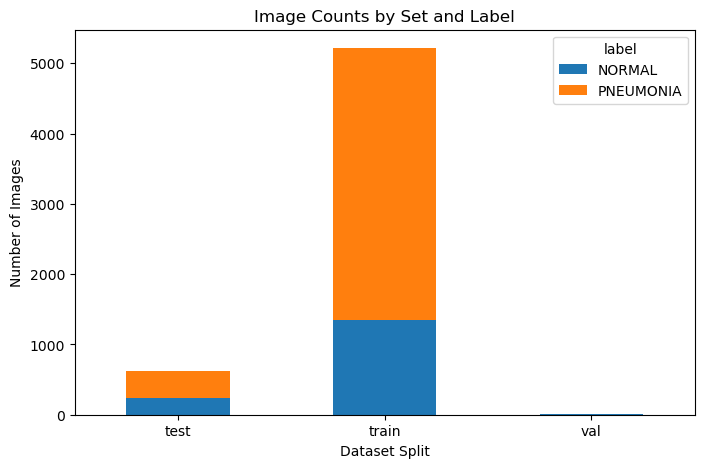

In [5]:
df.groupby(['set', 'label']).size().unstack().plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Image Counts by Set and Label")
plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.show()

✅ **Data Wrangling Summary**:
- Image file paths were successfully gathered into a DataFrame
- Each image is labeled as `NORMAL` or `PNEUMONIA` and assigned to `train`, `val`, or `test`
- Data is now ready for further exploratory analysis and preprocessing
